In [17]:
import pandas
import numpy

In [18]:
import pandas as pd
from datetime import datetime

# Define the column names as provided
column_names = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']

# Load the data with proper column names
df = pd.read_csv('data/data.txt', sep=' ', header=None, names=column_names)

# Function to parse the time with fallback for different formats
def parse_time(time_str):
    try:
        return datetime.strptime(time_str, '%H:%M:%S.%f').time()
    except ValueError:
        try:
            return datetime.strptime(time_str, '%H:%M:%S').time()
        except ValueError:
            return None

# Apply the function to the 'time' column
df['time'] = df['time'].apply(parse_time)

# Ensure the 'date' column is parsed correctly
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce').dt.date

# Ensure correct data types for other columns
df['epoch'] = pd.to_numeric(df['epoch'], errors='coerce').astype('Int64')
df['moteid'] = pd.to_numeric(df['moteid'], errors='coerce').astype('Int64')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')
df['light'] = pd.to_numeric(df['light'], errors='coerce')
df['voltage'] = pd.to_numeric(df['voltage'], errors='coerce')

# Print the last few rows of the dataframe to verify
print(df.tail())

# Optionally, handle any rows where the date or time could not be parsed
invalid_dates = df[df['date'].isna()]
invalid_times = df[df['time'].isna()]

print("Rows with invalid dates:")
print(invalid_dates)

print("Rows with invalid times:")
print(invalid_times)


               date             time  epoch  moteid  temperature  humidity  \
2313677  2004-04-02  01:14:54.164318  61274    <NA>          NaN       NaN   
2313678  2004-04-02  01:17:53.670524  61275    <NA>          NaN       NaN   
2313679  2004-04-02  01:20:52.807972  61276    <NA>          NaN       NaN   
2313680  2004-04-02  01:26:53.950342  61278    <NA>          NaN       NaN   
2313681  2004-04-02  01:35:53.897412  61280    <NA>          NaN       NaN   

         light  voltage  
2313677    NaN      NaN  
2313678    NaN      NaN  
2313679    NaN      NaN  
2313680    NaN      NaN  
2313681    NaN      NaN  
Rows with invalid dates:
Empty DataFrame
Columns: [date, time, epoch, moteid, temperature, humidity, light, voltage]
Index: []
Rows with invalid times:
Empty DataFrame
Columns: [date, time, epoch, moteid, temperature, humidity, light, voltage]
Index: []


In [19]:
df = df.dropna()

# Print the last few rows of the dataframe to verify
len(df)

2219803

In [20]:
df.head(37800)

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.027850,3,1,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.333930,11,1,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1,19.1750,38.83790,45.08,2.69964
...,...,...,...,...,...,...,...,...
37795,2004-03-17,21:01:01.879306,54245,1,22.5364,38.25800,43.24,2.47467
37796,2004-03-17,21:01:24.222626,54246,1,22.5364,38.18970,43.24,2.46440
37797,2004-03-17,21:02:28.422306,54248,1,22.5266,38.39460,43.24,2.46440
37798,2004-03-30,13:00:44.207767,54249,1,122.1530,-3.91901,338.56,2.11359


In [21]:
# Select the top 100 rows
top_100_df = df.head(50000)

# Find the number of unique moteid values in the top 100 rows
unique_moteids_count = top_100_df['moteid'].nunique()

print(f'The number of unique moteid values in the top 100 rows is: {unique_moteids_count}')

The number of unique moteid values in the top 100 rows is: 2


In [22]:
df[df['moteid'] == 54]

,date,time,epoch,moteid,temperature,humidity,light,voltage
2267906,2004-03-31,04:14:54.531540,2,54,122.0160,24.8726,0.46,1.99973
2267907,2004-03-31,05:00:54.212521,3,54,122.1530,35.3687,0.46,1.98635
2267908,2004-03-31,04:15:45.766594,4,54,121.5650,25.0177,0.46,1.99973
2267909,2004-03-31,05:23:53.299212,5,54,122.1530,38.8039,0.46,1.97973
2267910,2004-03-31,04:41:18.314713,6,54,121.8790,31.7368,0.46,1.99302
...,...,...,...,...,...,...,...,...
2303285,2004-03-21,18:53:27.558979,65510,54,21.4780,47.6361,0.46,2.35683
2303286,2004-03-21,18:54:43.117051,65512,54,21.4780,47.6361,0.46,2.34751
2303287,2004-03-21,18:57:30.336879,65518,54,21.4192,47.6687,0.46,2.34751
2303288,2004-03-21,18:59:36.673512,65522,54,21.3996,47.7013,0.46,2.34751


In [23]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Parse the 'time' column dynamically
df['time'] = pd.to_datetime(df['time'], errors='coerce', format='%H:%M:%S.%f').dt.time
df['time'] = df['time'].fillna(pd.to_datetime(df['time'], errors='coerce', format='%H:%M:%S').dt.time)

In [24]:
# Remove rows where 'time' could not be parsed (NaT values)
df = df.dropna(subset=['time'])

In [25]:

# Combine 'date' and 'time' into a single 'datetime' column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))


In [26]:
df = df[df['temperature'] <= 35]

In [27]:
df.describe()

,date,epoch,moteid,temperature,humidity,light,voltage,datetime
count,1812035,1812035.0,1812035.0,1.812035e+06,1.812035e+06,1.812035e+06,1.812035e+06,1812035
mean,2004-03-09 15:06:16.019889152,30149.362869,28.897668,2.201539e+01,3.926629e+01,4.089363e+02,2.556051e+00,2004-03-10 03:09:40.850130816
min,2004-02-28 00:00:00,0.0,1.0,-3.840000e+01,-8.983130e+03,0.000000e+00,1.803690e-02,2004-02-28 00:58:46.002832
25%,2004-03-04 00:00:00,14288.0,17.0,1.998840e+01,3.536870e+01,3.956000e+01,2.474670e+00,2004-03-04 04:21:02.689847040
50%,2004-03-09 00:00:00,28460.0,30.0,2.179160e+01,4.039900e+01,1.582400e+02,2.582260e+00,2004-03-09 02:07:50.318541056
75%,2004-03-15 00:00:00,44843.0,43.0,2.360460e+01,4.385150e+01,5.667200e+02,2.639640e+00,2004-03-15 10:20:17.476448
max,2004-04-05 00:00:00,65535.0,58.0,3.499220e+01,1.148940e+02,1.847360e+03,3.159150e+00,2004-04-05 11:02:32.715337
std,NaN,18581.495896,15.360598,3.599409e+00,9.733649e+00,5.407553e+02,1.181588e-01,NaN


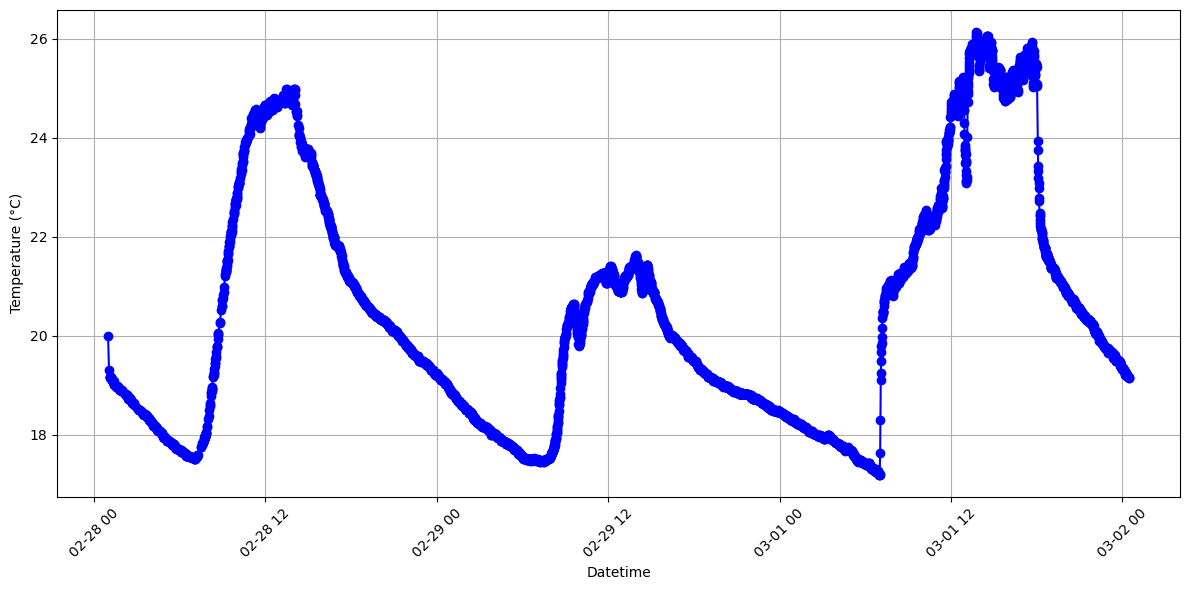

In [31]:
# Filter the top 20 rows
top_df =df.head(5000)
# Plot datetime vs temperature for the top 20 rows
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(top_df['datetime'], top_df['temperature'], marker='o', linestyle='-', color='b')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

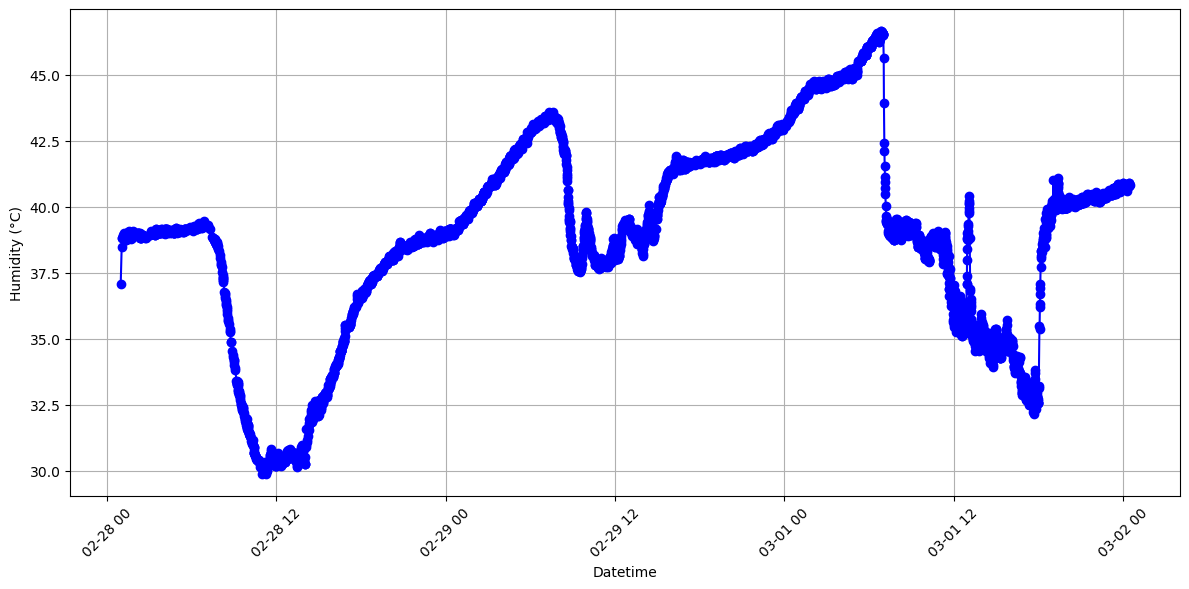

: 

In [32]:
# Filter the top 20 rows
top_df =df.head(5000)
# Plot datetime vs temperature for the top 20 rows
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(top_df['datetime'], top_df['humidity'], marker='o', linestyle='-', color='b')
plt.xlabel('Datetime')
plt.ylabel('Humidity (°C)')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

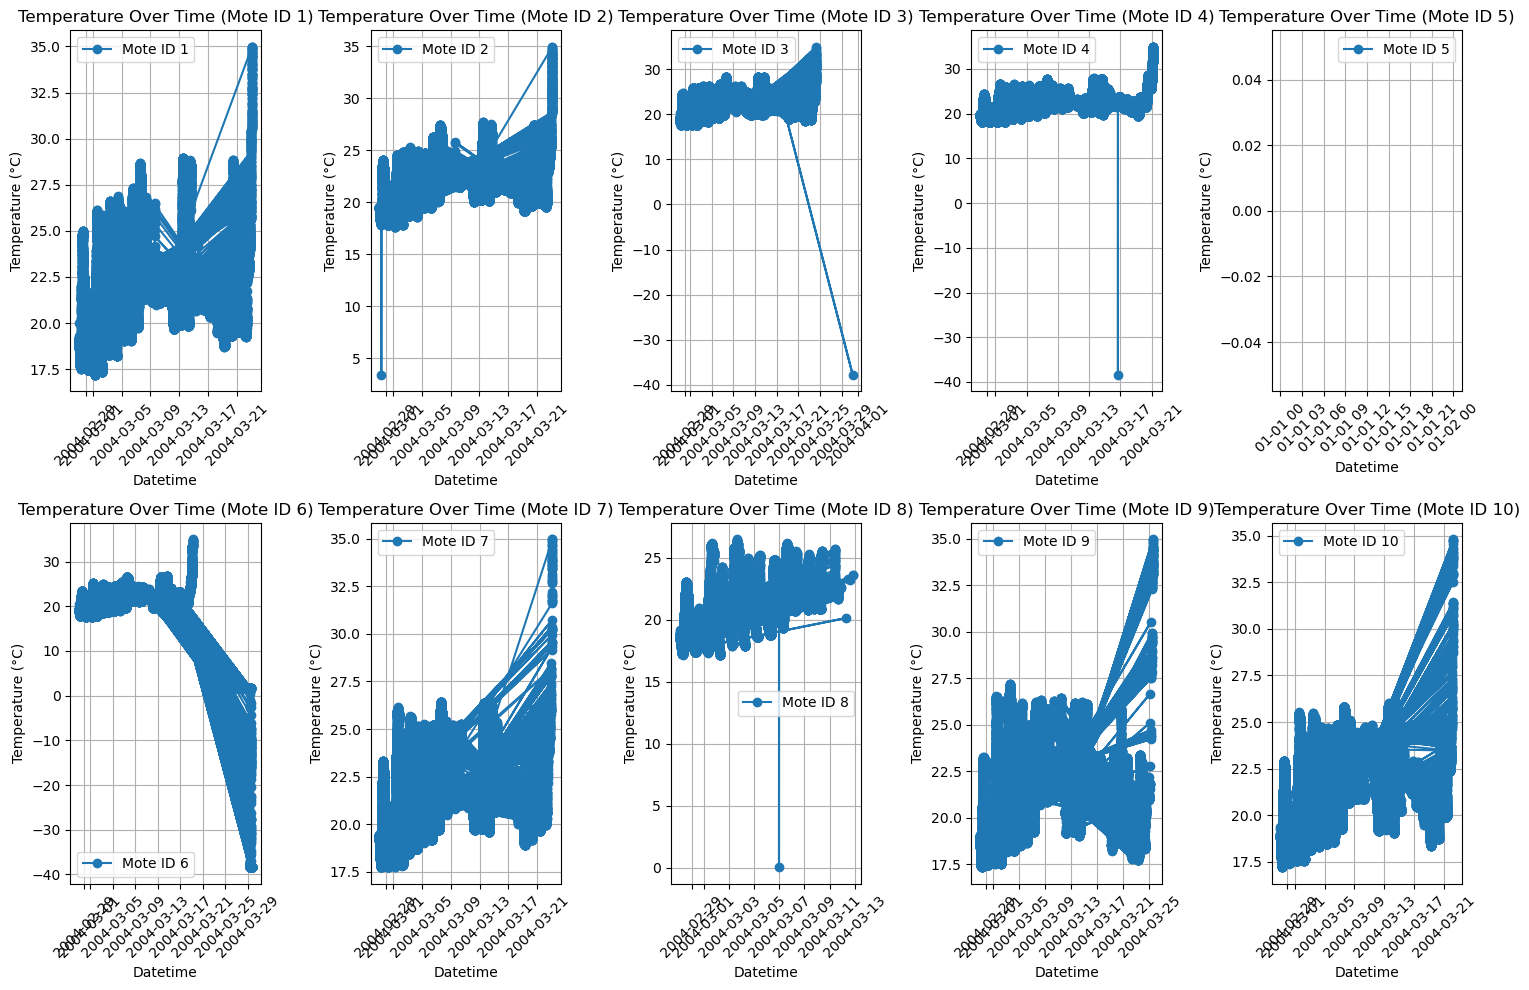

In [123]:
filtered_df = df[df['moteid'].isin([1, 2, 3, 4,5,6,7,8,9,10])]

# Initialize the plot
plt.figure(figsize=(15, 10))

# Loop through each moteid and create a subplot
for moteid in range(1, 11):
    moteid_df = filtered_df[filtered_df['moteid'] == moteid]
    plt.subplot(2, 5, moteid)  # Create a 2x2 grid of subplots
    plt.plot(moteid_df['datetime'], moteid_df['temperature'], marker='o', linestyle='-', label=f'Mote ID {moteid}')
    plt.xlabel('Datetime')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperature Over Time (Mote ID {moteid})')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

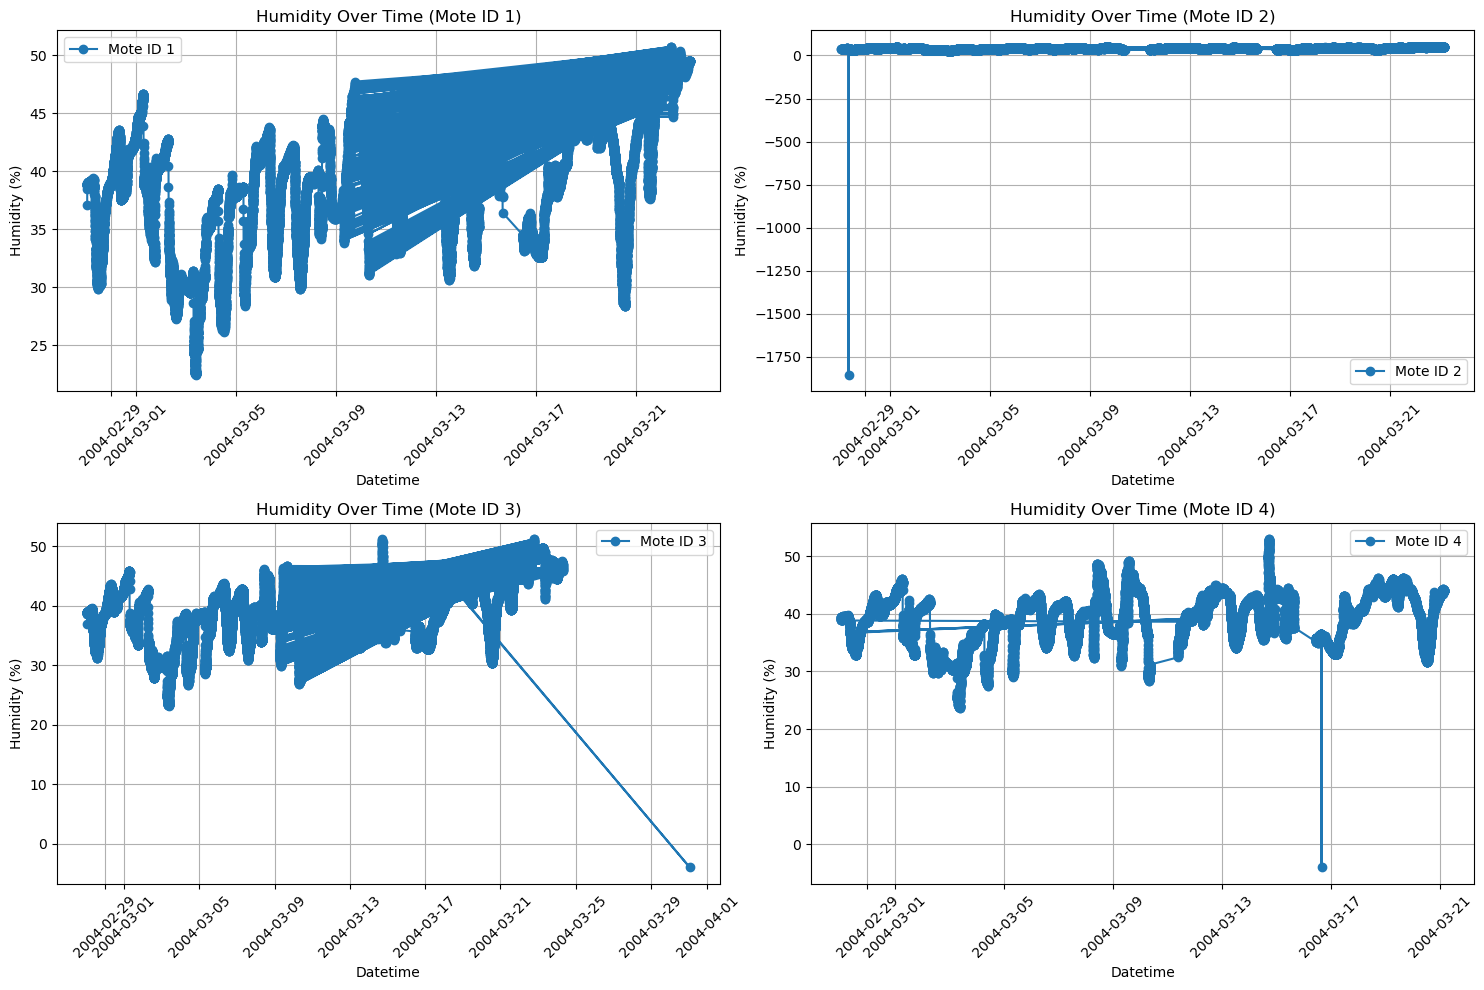

In [92]:
# Initialize the plot
plt.figure(figsize=(15, 10))

# Loop through each moteid and create a subplot for humidity
for moteid in range(1, 5):
    moteid_df = filtered_df[filtered_df['moteid'] == moteid]
    plt.subplot(2, 2, moteid)  # Create a 2x2 grid of subplots
    plt.plot(moteid_df['datetime'], moteid_df['humidity'], marker='o', linestyle='-', label=f'Mote ID {moteid}')
    plt.xlabel('Datetime')
    plt.ylabel('Humidity (%)')
    plt.title(f'Humidity Over Time (Mote ID {moteid})')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

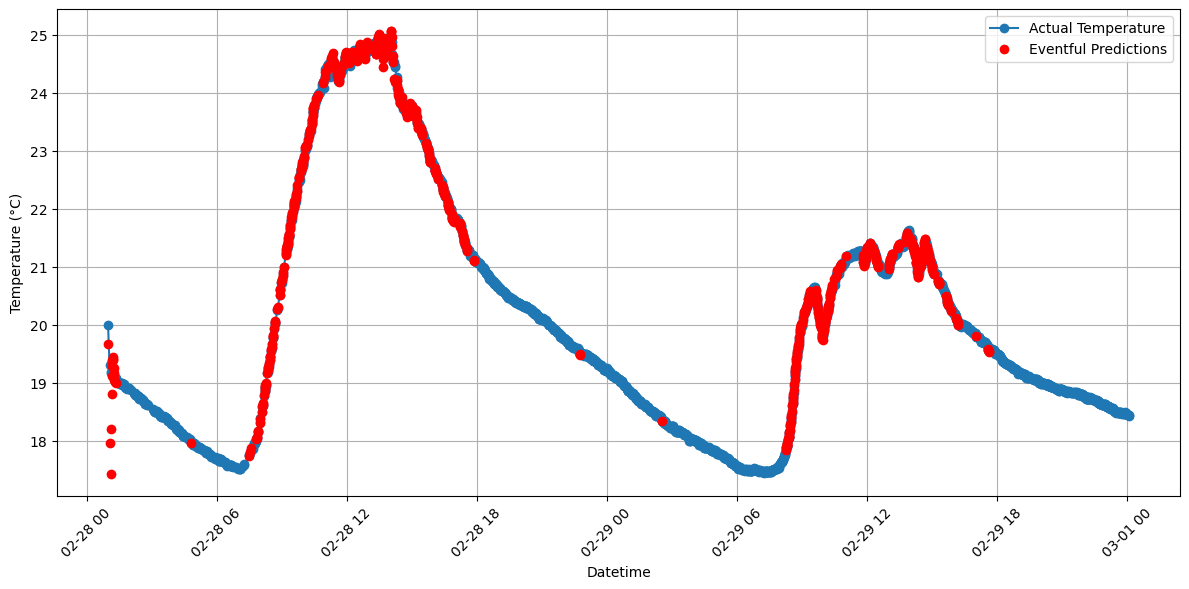

Total number of temperature readings: 3050
Number of eventful predictions: 645


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your existing DataFrame with 'datetime' and 'temperature' columns
# Ensure the 'datetime' column is in datetime format if not already done
df['datetime'] = pd.to_datetime(df['datetime'])

# Use the top 150 rows
top_150_df = df.head(3050)

# Constants for the filter
alpha = 0.4  # Filter coefficient for state update
beta = 0.4  # Filter coefficient for rate of change update
epsilon = 0.01  # Sensitivity threshold for event detection
delta_epsilon = 1e-1  # Small value to avoid division by zero

# Initial conditions
x1 = 20  # Assume initial temperature (state)
x2 = 0.01   # Initial rate of change of temperature
t_previous = top_150_df['datetime'].iloc[0].timestamp()

# Filter and prediction functions
def dEWMA_filter(z, x1, x2, t, t_previous):
    delta_t = t - t_previous
    delta_t = delta_t if delta_t > 0 else delta_epsilon  # Prevent division by zero
    x1_new = alpha * z + (1 - alpha) * (x1 + x2 * delta_t)
    x2_new = beta * (x1_new - x1) / delta_t + (1 - beta) * x2
    return x1_new, x2_new

def predict_sink_state(x1, x2, t, t_sink):
    delta_t = t_sink - t
    y_sink = x1 + x2 * delta_t
    return y_sink

# Apply the dEWWM filter to the actual temperature readings
sink = []
timestamps = []
total_readings = 0
eventful_readings = 0

for index, row in top_150_df.iterrows():
    t_current = row['datetime'].timestamp()
    z = row['temperature']
    x1, x2 = dEWMA_filter(z, x1, x2, t_current, t_previous)
    y_sink = predict_sink_state(x1, x2, t_current, t_current + 32)  # Predict the state 32 seconds into the future

    total_readings += 1  # Increment total readings count

    if abs(y_sink - x1) > epsilon:
        eventful_readings += 1  # Increment eventful readings count
        sink.append(y_sink)
        timestamps.append(row['datetime'])

    t_previous = t_current

# Plot the actual temperature and eventful predictions
plt.figure(figsize=(12, 6))
plt.plot(top_150_df['datetime'], top_150_df['temperature'], label='Actual Temperature', marker='o')
if sink:
    plt.plot(timestamps, sink, 'ro', label='Eventful Predictions')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
#plt.title('Temperature Over Time (Top 150 Rows)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total number of temperature readings:", total_readings)
print("Number of eventful predictions:", eventful_readings)


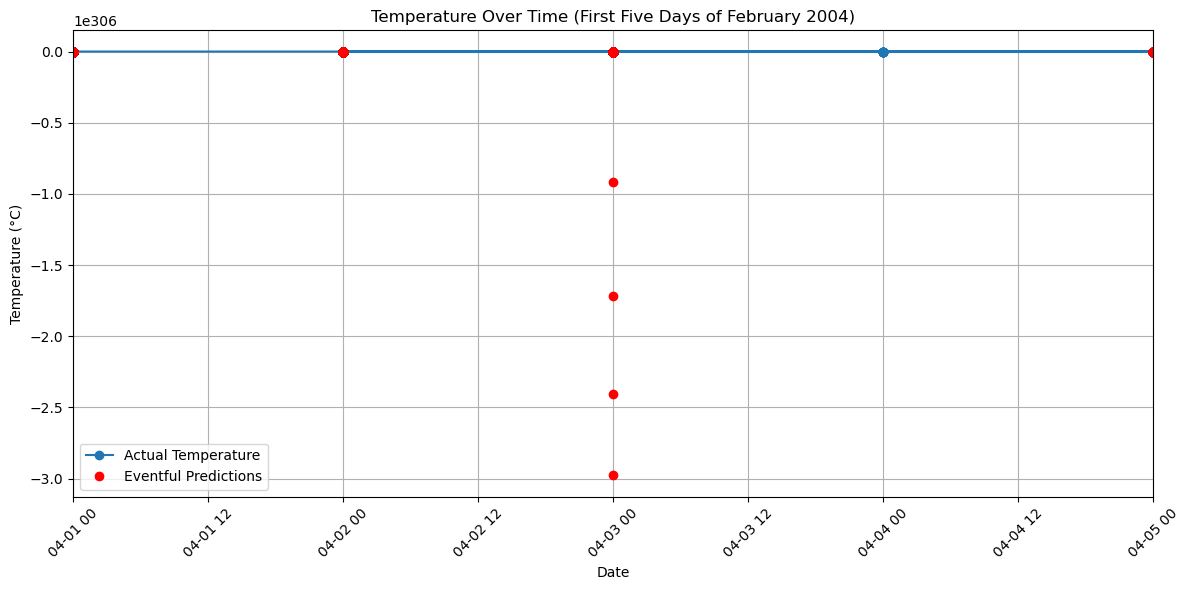

Total number of temperature readings: 3618
Number of eventful predictions: 2050


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Filter the data for the first five days of February 2004
start_date = '2004-04-01'
end_date = '2004-04-05'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Constants for the filter
alpha = 0.1  # 
beta = 0.2   #
epsilon = 0.1  
delta_epsilon = 1e-10  # 

# Initial conditions
x1 = 20  # 
x2 = 0   # 
t_previous = time.time()

# Filter and prediction functions
def dEWMA_filter(z, x1, x2, t, t_previous):
    delta_t = t - t_previous
    delta_t = delta_t if delta_t > 0 else delta_epsilon  # Prevent division by zero
    x1_new = alpha * z + (1 - alpha) * (x1 + x2 * delta_t)
    x2_new = beta * (x1_new - x1) / delta_t + (1 - beta) * x2
    return x1_new, x2_new

def predict_sink_state(x1, x2, t, t_sink):
    delta_t = t_sink - t
    y_sink = x1 + x2 * delta_t
    return y_sink

# 
sink = []
timestamps = []
current_minute = 0
start_time = time.time()

total_readings = 0
eventful_readings = 0

for index, row in filtered_df.iterrows():
    t_current = time.time()
    z = row['temperature']
    x1, x2 = dEWMA_filter(z, x1, x2, t_current, t_previous)
    y_sink = predict_sink_state(x1, x2, t_current, t_current + 1 / 60)  # Predict the state one minute into the future

    total_readings += 1  # Increment total readings count

    if abs(y_sink - x1) > epsilon:
        eventful_readings += 1  # Increment eventful readings count
        sink.append(y_sink)
        timestamps.append(row['date'])

    t_previous = t_current
    current_minute += 1

# Plot the actual temperature and eventful predictions
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['date'], filtered_df['temperature'], label='Actual Temperature', marker='o')
if sink:
    plt.plot(timestamps, sink, 'ro', label='Eventful Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time (First Five Days of February 2004)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))  # Set x-axis limits explicitly
plt.tight_layout()
plt.show()

print("Total number of temperature readings:", total_readings)
print("Number of eventful predictions:", eventful_readings)


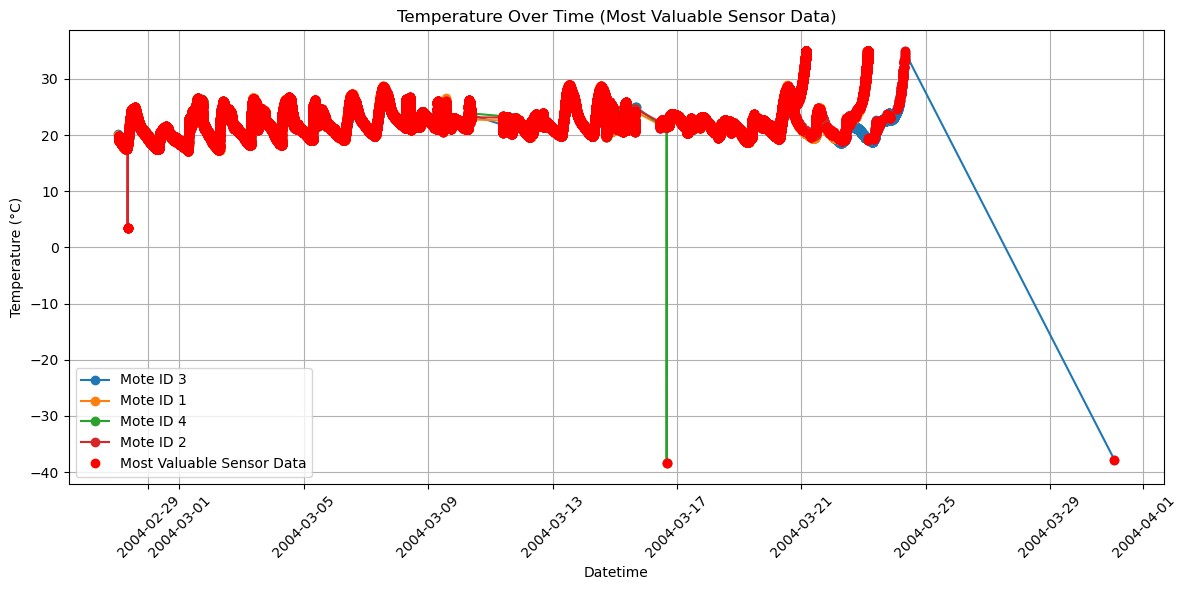

                         datetime  temperature  moteid
0      2004-02-28 01:03:16.333930      19.3024       1
1      2004-02-28 01:03:46.702054      19.4396       3
2      2004-02-28 01:04:46.797534      19.4102       3
3      2004-02-28 01:05:16.212397      19.4102       3
4      2004-02-28 01:05:16.212397      19.4102       3
...                           ...          ...     ...
147973 2004-03-24 07:47:32.063320      33.8456       3
147974 2004-03-24 08:00:32.201529      34.1886       3
147975 2004-03-24 08:08:32.229305      34.9530       3
147976 2004-03-24 08:09:31.876955      34.6884       3
147977 2004-03-31 01:35:15.687956     -37.7826       3

[147978 rows x 3 columns]


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

# Assuming df is your existing DataFrame with 'datetime', 'temperature', and 'moteid' columns
# Ensure the 'datetime' column is in datetime format if not already done
df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the DataFrame to include only rows where 'moteid' is between 1 and 4
filtered_df = df[df['moteid'].isin([1, 2, 3, 4])]

# Sort the data by datetime to simulate real-time streaming
filtered_df = filtered_df.sort_values('datetime')

# Initialize a dictionary to store recent samples for each node
recent_samples = {moteid: deque(maxlen=5) for moteid in [1, 2, 3, 4]}  # Using a buffer size of 5 for recent samples

# Initialize a list to store the most valuable sensor data and the associated metadata
valuable_sensor_data = []

# Simulate real-time data processing
for _, row in filtered_df.iterrows():
    moteid = row['moteid']
    current_sample = row[['datetime', 'temperature', 'moteid']]

    # Append current sample to the recent samples buffer
    recent_samples[moteid].append(current_sample)

    # Calculate the change in temperature for each node
    temperature_changes = {}
    for moteid, samples in recent_samples.items():
        if len(samples) > 1:
            temperatures = [sample['temperature'] for sample in samples]
            temperature_change = max(temperatures) - min(temperatures)
            temperature_changes[moteid] = temperature_change

    # Predict the node with the most relevant information (highest change in temperature)
    if temperature_changes:
        most_valuable_node = max(temperature_changes, key=temperature_changes.get)
        most_valuable_sample = recent_samples[most_valuable_node][-1]
        # Save the relevant information
        valuable_sensor_data.append({
            'datetime': most_valuable_sample['datetime'],
            'temperature': most_valuable_sample['temperature'],
            'moteid': most_valuable_node
        })

# Convert the list to a DataFrame
valuable_sensor_df = pd.DataFrame(valuable_sensor_data)

# Save the DataFrame to a CSV file
valuable_sensor_df.to_csv('valuable_sensor_data.csv', index=False)

# Plot the actual temperature over time for the most valuable sensor data
plt.figure(figsize=(12, 6))
for moteid in filtered_df['moteid'].unique():
    moteid_df = filtered_df[filtered_df['moteid'] == moteid]
    plt.plot(moteid_df['datetime'], moteid_df['temperature'], marker='o', linestyle='-', label=f'Mote ID {moteid}')

plt.plot(valuable_sensor_df['datetime'], valuable_sensor_df['temperature'], 'ro', label='Most Valuable Sensor Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time (Most Valuable Sensor Data)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(valuable_sensor_df)
